# Geostrophic adjustment and inertia-gravity waves
### MAQ - 32806, Chiel van Heerwaarden, 2016
In this tutorial you will use the previously derived shallow water equations to study the concept of geostrophic adjustment (again pioneered by Carl-Gustav Rossby). This you will do with a conceptual model that will help you understand the formation of a low pressure system out of an atmospheric disturbance.
___
### Loading the required packages
First, we load the required packages and set the physical constants.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import animation
from IPython.display import HTML
figsize_s = 6,4
figsize_l = 9,4

In [2]:
Omega = 7.29e-5 # Angular velocity of the earth.
g = 9.81        # Gravity constant.
a = 6.371e6     # Earth radius.

___
### 1. The shallow water equations for small perturbations
In this assignment, you are going to work with the linearized shallow water equations. This means that we assume that there is no background velocity, and that the velocities and height perturbations are small. Furthermore, to simplify the dynamics, we assume the Coriolis parameter $f$ to be a constant $f_0$.

$$
\begin{eqnarray}
\nonumber
\dfrac{\partial u^\prime}{\partial t} & = & f_0 v^\prime - \dfrac{\partial h^\prime}{\partial x}
\\
\nonumber
\dfrac{\partial v^\prime}{\partial t} & = & -f_0 u^\prime - \dfrac{\partial h^\prime}{\partial y}
\\
\nonumber
\dfrac{\partial h^\prime}{\partial t} & = &
- H \left( \dfrac{\partial u^\prime}{\partial x} +\dfrac{\partial v^\prime}{\partial y} \right)
\end{eqnarray}
$$

1. Explain the governing sets of equations. Why can we neglect the advection terms if the perturbations are small? And why is $h$ replaced by $H$ in the right-hand side of the third equation?
___

### 2. The shallow water equations for our experiment
In our experiment, you are going to study the behavior of a two-dimensional system. We study an initially non-moving water layer in which we introduce a dip in the height that only varies with $x$. The governing equations are

$$
\begin{eqnarray}
\nonumber
\dfrac{\partial u^\prime}{\partial t} & = & f_0 v^\prime - \dfrac{\partial h^\prime}{\partial x}
\\
\nonumber
\dfrac{\partial v^\prime}{\partial t} & = & -f_0 u^\prime
\\
\nonumber
\dfrac{\partial h^\prime}{\partial t} & = &
- H \dfrac{\partial u^\prime}{\partial x}
\end{eqnarray}
$$

1. Explain why the governing equations can be written as above if the initial perturbation has no gradients in $y$.
___

### 3. Setting up the experiment
Below, you can specify the setup of the experiment. The `f_multiplier` is initially set to `1` and can be adjusted later to make the earth spin faster or slower.

In [20]:
f_multiplier = 10.
lat = 45.
f0 = f_multiplier * 2.*Omega*np.sin(np.pi/180.*lat)
g = 9.81
a = 6.371e6
L = 6.371e6 * (2.*np.pi) * np.cos(np.pi/180.*lat)
L_dist = 1.e6
H = 200.
h_prime = 0.1

With the conditions above, we can create our domain (ranging from `-L/2` to `L/2`). The initial condition of $u^{\prime}$, $v^{\prime}$ and $h^{\prime}$ are stored in variables `u0`, `v0` and `h0`.

In [21]:
nx = 1501
x = np.linspace(-L/2., L/2., nx)
dx = x[1]-x[0]
u0 = np.zeros(nx)
v0 = np.zeros(nx)

# Gaussian
x_sigma = L_dist/6.
h0 = np.exp(-x**2/(2.*x_sigma**2))
h0 = - h_prime*h0/np.max(h0)

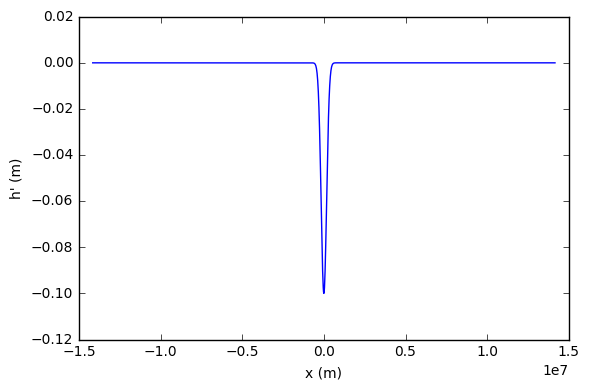

In [22]:
pl.figure(figsize=figsize_s)
pl.plot(x, h0, 'b-')
pl.xlabel('x (m)')
pl.ylabel('h\' (m)')
pl.tight_layout()

1. Plot the height profile of $h^{\prime}$ as a function of $x$.
2. Calculate the initial potential vorticity $q$ as a variable `q0` and plot it as a function of $x$.
3. Calculate the Rossby radius of deformation $L_r \equiv \dfrac{\sqrt{g H}}{f_0}$ for this experiment.
4. Replot $q$ and $h^{\prime}$ with the horizontal axis normalized by the Rossby radius $L_r$. How large is the perturbation compared to the Rossby radius?

___
### Running the experiment
Now, you will run the model for `nt` timesteps with time increments of `dt` seconds. The output is saved every `ni` steps. The final result of $u^{\prime}$, $v^{\prime}$ and $h^{\prime}$ are stored in variables `u`, `v` and `h`. Below you find an animation that shows the time evolution that can aid you in interpreting what is happening.

In [23]:
nt = 50000
ni = 500
dt = 10.

In [24]:
# MODEL INTEGRATOR, THIS MIGHT TAKE A WHILE!
u = np.copy(u0)
v = np.copy(v0)
h = np.copy(h0)

h_out = np.zeros((nt//ni+1, nx))
h_out[0,:] = h0

for n in range(1,nt+1):
    u += dt * (   f0*v - g*np.gradient(h,dx) )
    v += dt * ( - f0*u )
    h += dt * ( - H*np.gradient(u,dx) )
    
    if (n%ni == 0):
        h_out[n//ni,:] = h[:]

In [25]:
# ANIMATION CREATION PHASE 1. PLEASE IGNORE THIS FIGURE, WE DO NOT KNOW HOW TO SUPPRESS.
# Set up the figure, the axis, and the plot element we want to animate
fig, ax = pl.subplots(figsize=figsize_l)
xmin, xmax = min(x), max(x)
hmin, hmax = np.min(h_out), np.max(h_out)
hmin -= 0.05*(hmax-hmin)
hmax += 0.05*(hmax-hmin)
ax.set_xlim(xmin, xmax)
ax.set_ylim(hmin, hmax)
ax.set_xlabel('x (m)')
ax.set_ylabel('h (m)')
ax.plot(x, h_out[0,:], 'b:')
line, = ax.plot([], [], lw=2)
fig.tight_layout()
pl.close()

In [26]:
# ANIMATION CREATION PHASE 2
# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    line.set_data(x, h_out[i,:])
    return (line,)

# Call the animator. Keyword blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=h_out.shape[0], interval=40, blit=True)

HTML(anim.to_html5_video())

___
### Analysis of the experiment
Below you find the end result of the experiment. All three variables $h^{\prime}$, $u^{\prime}$ and $v^{\prime}$ are plotted.

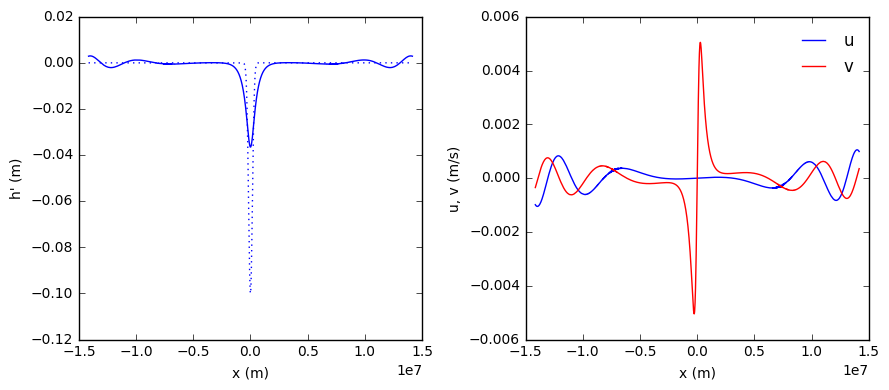

In [19]:
pl.figure(figsize=figsize_l)
pl.subplot(121)
pl.plot(x, h , 'b-')
pl.plot(x, h0, 'b:')
pl.xlabel('x (m)')
pl.ylabel('h\' (m)')
pl.subplot(122)
pl.plot(x, u, 'b-', label='u')
pl.plot(x, v, 'r-', label='v')
pl.xlabel('x (m)')
pl.ylabel('u, v (m/s)')
pl.legend(loc=0, frameon=False);
pl.tight_layout()

1. What do you see in the figure above? Is this what you expected? Why does the surface not become flat?
2. Replot the figure above, but normalize $x$ again with $L_r$ and limit the range between -8 and 8. Within how many Rossby radii is the initial perturbation contained?
3. Calculate the potential vorticity at the end of the simulation and compare it to the initial value. How has it changed?
4. Rerun the experiment for an earth that spins four times faster (set `f_multiplier = 4.`) and for one that spins four times slower (set `f_multiplier = 0.25`).

In [11]:
q0 = f/h0
q  = (np.gradient(v,dx) + f) / h
pl.figure(figsize=figsize_s)
pl.plot(x/Lr, q , label='q_end  ')
pl.plot(x/Lr, q0, label='q_start')
pl.xlabel('x')
pl.ylabel('q')
pl.xlim(-8, 8)
pl.legend(loc=0, frameon=False);
pl.tight_layout()

NameError: name 'f' is not defined

In [ ]:
print("Summing from x/Lr = ({0}, {1})".format(x[i_start]/Lr, x[i_end]/Lr))
print("A fraction {0} of the potential energy is retained near the disturbance."\
    .format(sum((h_out[-1,i_start:i_end]-h_ref)**2)/sum((h_out[0,i_start:i_end]-h_ref)**2)))
print("A fraction {0} of the initial height is retained."\
    .format( (h_out[-1,nx//2]-h_ref) / (h_out[0,nx//2]-h_ref) ))
    
pl.plot(x[i_start:i_end]/Lr, h_out[-1,i_start:i_end]-h_ref, lw=2)
pl.plot(x[i_start:i_end]/Lr, h_out[ 0,i_start:i_end]-h_ref, 'b--')
pl.xlim(x[i_start]/Lr, x[i_end]/Lr)
pl.xlabel('x/Lr')
pl.ylabel('h-h_ref')
pl.tight_layout();

In the previous tutorial, you have derived the potential vorticity. As you have discovered that the material derivative is conserved, the final solution can be found from the initial conditions, without solving the time varying equations. This can be done by matrix inversion.

In the steady state, we have
$$
0 = fv - g \dfrac{\partial h}{\partial x}\\
0 = -fu\\
0 = -H \dfrac{\partial u}{\partial x}
$$
and we know that potential vorticity has not changed:
$$
q = q_0
$$
___
* Derive an equation that relates $h$ to the initial potential vorticity $q_0$. This is a differential equation, you do not have to solve it.
___

In [ ]:
class steady_state:
    def __init__(self, f):
        q0 = f/h0
        c1 = g/(f*dx**2)
    
        # Matrix solver
        M = np.zeros((nx, nx))
    
        for i in range(1,nx-1):
            M[i,i-1] = c1
            M[i,i  ] = -(2.*c1 + q0[i])
            M[i,i+1] = c1

        M[ 0, 0] = 1.
        M[-1,-1] = 1.

        h_mat = -1.*np.ones(nx)*f
        h_mat[ 0] = h_ref
        h_mat[-1] = h_ref

        self.h = np.linalg.inv(M).dot(h_mat)
        self.v = g/f*np.gradient(self.h, dx)
        
        self.Lr = (g*h_ref)**.5/f
        
sol = steady_state(f)

# Plot solutions.    
pl.figure(figsize=figsize_l)
pl.subplot(121)
pl.plot(x/Lr, h_out[ 0,:], 'k:', label='initial')
pl.plot(x/Lr, sol.h, 'y-', lw=2, label='analytical')
pl.plot(x/Lr, h_out[-1,:], 'k--', lw=2, label='simulation')
pl.xlim(-20, 20)
pl.xlabel('x/Lr')
pl.ylabel('h')
pl.legend(loc=0, frameon=False)
pl.subplot(122)
pl.plot(x/Lr, v_out[ 0,:], 'k:', label='initial')
pl.plot(x/Lr, sol.v, 'y-', lw=2, label='analytical')
pl.plot(x/Lr, v_out[-1,:], 'k--', lw=2, label='simulation')
pl.xlim(-20, 20)
pl.xlabel('x/Lr')
pl.ylabel('v')
pl.legend(loc=0, frameon=False)
pl.tight_layout()

In [ ]:
f_half = 0.5*f
f_double = 2.*f

sol_ref = steady_state(f)
sol_half = steady_state(f_half)
sol_double = steady_state(f_double)

pl.figure(figsize=figsize_l)
pl.subplot(121)
pl.plot(x, sol_ref.h    - h_ref, 'b-')
pl.plot(x, sol_half.h   - h_ref, 'r-')
pl.plot(x, sol_double.h - h_ref, 'g-')
pl.plot(x, h0 - h_ref, 'k:')
pl.xlabel('x')
pl.ylabel('h')
pl.xlim(-30*x_sigma, 30*x_sigma)
pl.subplot(122)
pl.plot(x, sol_ref.v   , 'b-', label='ref'   )
pl.plot(x, sol_half.v  , 'r-', label='half'  )
pl.plot(x, sol_double.v, 'g-', label='double')
pl.xlabel('x')
pl.ylabel('v')
pl.xlim(-30*x_sigma, 30*x_sigma)
pl.legend(loc=0, frameon=False);
pl.tight_layout()

In [ ]:
pl.figure(figsize=figsize_l)
pl.subplot(121)
pl.plot(x/sol_ref.Lr   , (sol_ref.h    - h_ref)/sol_ref.Lr   , 'b-')
pl.plot(x/sol_half.Lr  , (sol_half.h   - h_ref)/sol_half.Lr  , 'r-')
pl.plot(x/sol_double.Lr, (sol_double.h - h_ref)/sol_double.Lr, 'g-')
pl.xlabel('x/Lr')
pl.ylabel('h')
pl.xlim(-8, 8)
pl.subplot(122)
pl.plot(x/sol_ref.Lr   , sol_ref.v   , 'b-', label='ref'   )
pl.plot(x/sol_half.Lr  , sol_half.v  , 'r-', label='half'  )
pl.plot(x/sol_double.Lr, sol_double.v, 'g-', label='double')
pl.xlabel('x/Lr')
pl.ylabel('v')
pl.xlim(-8, 8)
pl.legend(loc=0, frameon=False);
pl.tight_layout()

___
End of tutorial.
___